<a href="https://www.kaggle.com/code/subhajeetdas/amazon-stock-price-prediction?scriptVersionId=125810784" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1>Amazon Stock Price Detection</h1>

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import datetime

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/amazon-stock-price-all-time/Amazon.csv


# Loading Data

In [2]:
df = pd.read_csv("/kaggle/input/amazon-stock-price-all-time/Amazon.csv")

In [3]:
viz = df.copy()

In [4]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
5,1997-05-22,1.437500,1.447917,1.312500,1.395833,1.395833,11776800
6,1997-05-23,1.406250,1.520833,1.333333,1.500000,1.500000,15937200
7,1997-05-27,1.510417,1.645833,1.458333,1.583333,1.583333,8697600
8,1997-05-28,1.625000,1.635417,1.531250,1.531250,1.531250,4574400
9,1997-05-29,1.541667,1.541667,1.479167,1.505208,1.505208,3472800


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.shape

(6155, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6155 non-null   object 
 1   Open       6155 non-null   float64
 2   High       6155 non-null   float64
 3   Low        6155 non-null   float64
 4   Close      6155 non-null   float64
 5   Adj Close  6155 non-null   float64
 6   Volume     6155 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 336.7+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,6155.0,5.205563e+02,8.571617e+02,1.406250,3.875000e+01,9.267000e+01,5.289500e+02,3.744000e+03
High,6155.0,5.262161e+02,8.658210e+02,1.447917,3.951500e+01,9.419000e+01,5.353050e+02,3.773080e+03
Low,6155.0,5.142773e+02,8.472709e+02,1.312500,3.810500e+01,9.075000e+01,5.219500e+02,3.696790e+03
Close,6155.0,5.204298e+02,8.566685e+02,1.395833,3.882125e+01,9.264000e+01,5.294500e+02,3.731410e+03
Adj Close,6155.0,5.204298e+02,8.566685e+02,1.395833,3.882125e+01,9.264000e+01,5.294500e+02,3.731410e+03
Volume,6155.0,7.329010e+06,7.149521e+06,487200.000000,3.579350e+06,5.470000e+06,8.294950e+06,1.043292e+08


# Train & Test Splitting the Data

In [9]:
train, test = train_test_split(df, test_size = 0.2)

In [10]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
5560,2019-06-20,1933.329956,1935.199951,1905.800049,1918.189941,1918.189941,3217200
4595,2015-08-19,533.739990,537.250000,529.000000,532.919983,532.919983,2324000
1285,2002-06-26,14.690000,15.930000,14.680000,15.850000,15.850000,8272200
1955,2005-02-23,34.950001,34.970001,33.200001,34.139999,34.139999,10500400
1409,2002-12-20,21.790001,22.010000,21.600000,21.930000,21.930000,4935300
3738,2012-03-22,190.539993,194.059998,190.259995,192.399994,192.399994,3739600
2357,2006-09-27,32.279999,32.459999,31.930000,32.330002,32.330002,5469800
930,2001-01-23,18.375000,19.312500,18.250000,18.953125,18.953125,4744300
4612,2015-09-14,529.440002,532.450012,518.580017,521.380005,521.380005,3130200
2325,2006-08-11,26.430000,26.430000,25.760000,26.070000,26.070000,5115900


In [11]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1118,2001-10-25,7.390000,7.780000,7.150000,7.770000,7.770000,9267800
2216,2006-03-08,36.720001,37.470001,36.610001,36.810001,36.810001,6236600
4697,2016-01-14,580.250000,602.250000,569.880005,593.000000,593.000000,7238000
575,1999-08-26,66.500000,67.781250,63.750000,64.281250,64.281250,19244200
1645,2003-11-28,52.840000,54.060001,52.830002,53.970001,53.970001,3983000
4254,2014-04-11,314.000000,316.500000,309.500000,311.730011,311.730011,7287500
542,1999-07-12,62.500000,62.750000,58.000000,58.687500,58.687500,10653200
3250,2010-04-16,144.880005,147.169998,141.449997,142.169998,142.169998,8396800
3664,2011-12-05,198.860001,199.000000,193.669998,196.240005,196.240005,5922100
2146,2005-11-23,48.770000,48.959999,48.090000,48.240002,48.240002,7483200


In [12]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [13]:
y_train = train['Close'].values
y_test = test['Close'].values

# Linear Regression 

In [14]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(x_test)

# Visualizing the Data

In [16]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [17]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-17,NaN
1997-05-18,NaN
1997-05-19,1.708333
...,...
2021-10-23,NaN
2021-10-24,NaN
2021-10-25,3320.370117


In [18]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

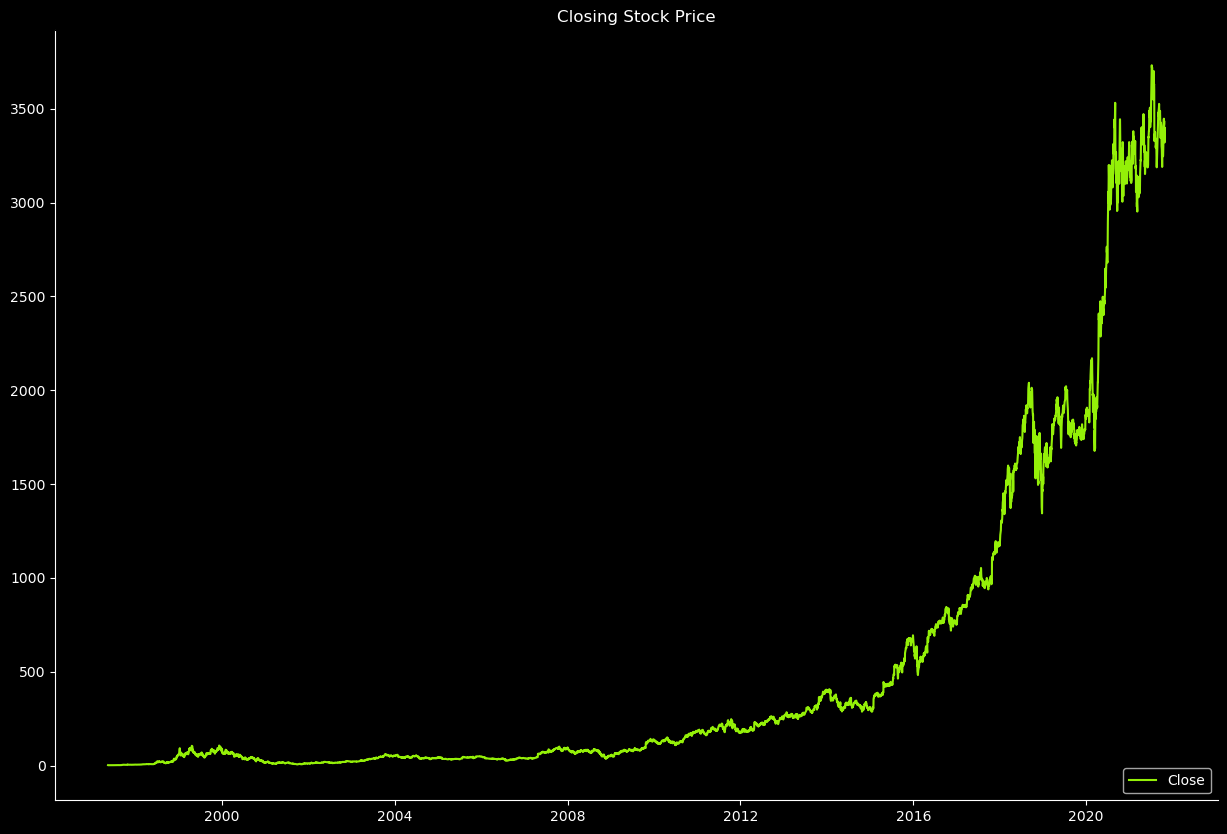

In [19]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

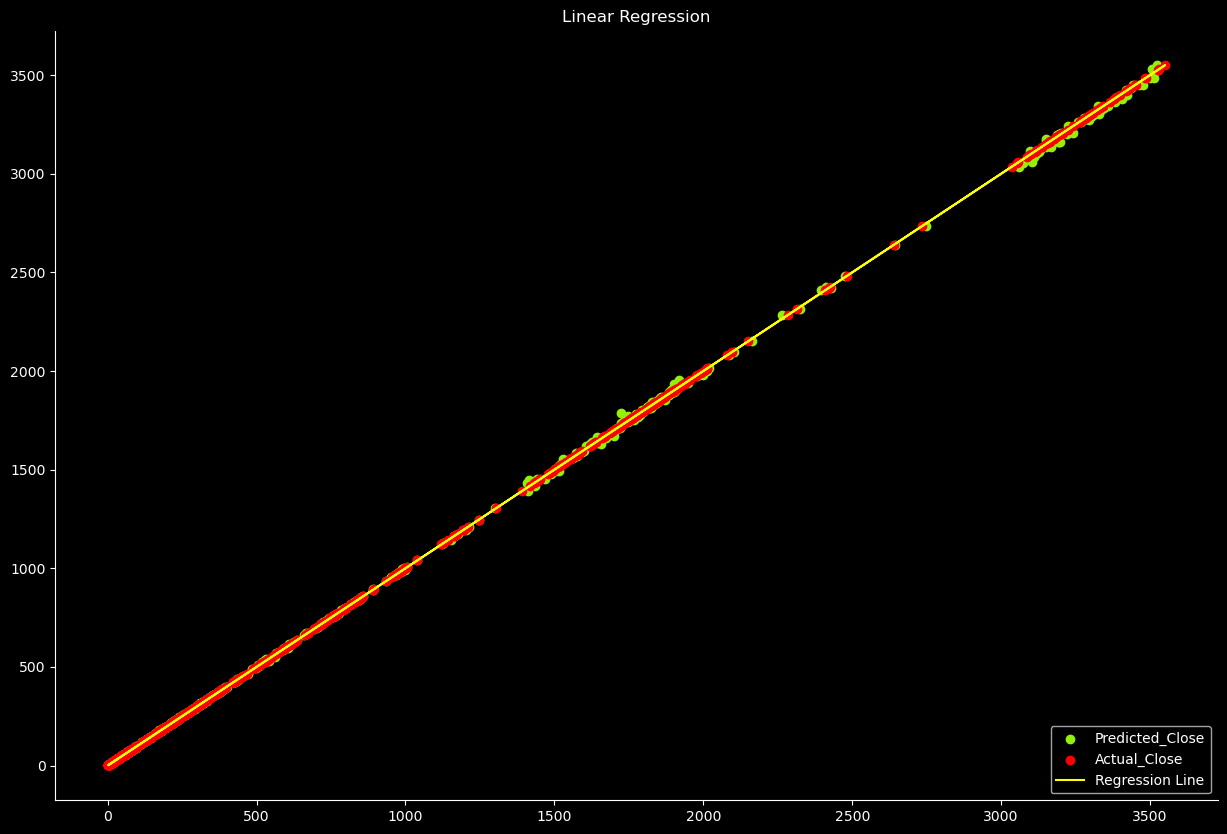

In [20]:
style()

plt.title('Linear Regression', color="white")
plt.scatter(y_pred, y_test, color="#94F008")
plt.scatter(y_test, y_test, color="red")
plt.plot(y_test, y_test, color="yellow")
plt.legend(["Predicted_Close", "Actual_Close", "Regression Line"], loc ="lower right", facecolor='black', labelcolor='white')

# Model Evaluation

In [21]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 35.707
RMSE 5.976
MAE 2.559
MAPE 0.009
R2 Score :  1.0


In [22]:
pred_df = test.copy()
pred_df

,Date,Open,High,Low,Close,Adj Close,Volume
1118,2001-10-25,7.390000,7.780000,7.150000,7.770000,7.770000,9267800
2216,2006-03-08,36.720001,37.470001,36.610001,36.810001,36.810001,6236600
4697,2016-01-14,580.250000,602.250000,569.880005,593.000000,593.000000,7238000
575,1999-08-26,66.500000,67.781250,63.750000,64.281250,64.281250,19244200
1645,2003-11-28,52.840000,54.060001,52.830002,53.970001,53.970001,3983000
...,...,...,...,...,...,...,...
1683,2004-01-26,56.799999,57.200001,56.299999,57.029999,57.029999,5566000
3662,2011-12-01,191.850006,198.070007,191.589996,197.130005,197.130005,7327700
1912,2004-12-21,38.840000,39.419998,38.639999,39.389999,39.389999,5229400
4798,2016-06-09,723.099976,728.909973,722.299988,727.650024,727.650024,2170300


In [23]:
result = model.predict([[2.437500, 2.500000, 1.927083, 72156000]])
print(result)

[1.63175552]


In [24]:
pred_df['Close_Prediction'] = y_pred
pred_df

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
1118,2001-10-25,7.390000,7.780000,7.150000,7.770000,7.770000,9267800,7.517766
2216,2006-03-08,36.720001,37.470001,36.610001,36.810001,36.810001,6236600,37.271176
4697,2016-01-14,580.250000,602.250000,569.880005,593.000000,593.000000,7238000,590.418090
575,1999-08-26,66.500000,67.781250,63.750000,64.281250,64.281250,19244200,65.374500
1645,2003-11-28,52.840000,54.060001,52.830002,53.970001,53.970001,3983000,53.872142
...,...,...,...,...,...,...,...,...
1683,2004-01-26,56.799999,57.200001,56.299999,57.029999,57.029999,5566000,56.776895
3662,2011-12-01,191.850006,198.070007,191.589996,197.130005,197.130005,7327700,196.784149
1912,2004-12-21,38.840000,39.419998,38.639999,39.389999,39.389999,5229400,39.191350
4798,2016-06-09,723.099976,728.909973,722.299988,727.650024,727.650024,2170300,727.466404


In [25]:
pred_df[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,1231.0,503.715210,820.852322,1.479167,38.380001,97.687500,492.035004,3549.590088
Close_Prediction,1231.0,504.107297,822.144502,1.538342,38.406320,96.724939,491.760178,3528.115647


<br>
<p style="text-align:center; font-weight:800; font-size:18px"><em>Thank you! For viewing this Notebook, do upvote if you like it and please feel free to provide feedback.</em>
<p style="text-align:center"><img src="https://cdn.pixabay.com/animation/2023/03/21/22/04/22-04-05-16_512.gif" width="480" height="200"></p>